### Fill in group number and member names:

In [1]:
GROUP = "22"
NAME1 = "Ivar Fagerfjäll"
NAME2 = "Hanna Frederiksen"

$\DeclareMathOperator{\prox}{prox}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\Sym}{\mathbb{S}}$
$\newcommand{\norm}[1]{\lVert{#1}\rVert}$
$\DeclareMathOperator{\sign}{sign}$
$\DeclareMathOperator{\diag}{diag}$
$\DeclareMathOperator{\relint}{relint}$
$\DeclareMathOperator{\dom}{dom}$
# Optimization for learning - FRTN50

## Assignment 1

The goal of this assignment is to become familiar with some of the steps involved in solving an optimization problem. In this assignment, you will form Fenchel dual problems, find gradients and/or proximal operators, and implement the proximal gradient method.

__Problem__ The problem we will solve is the following constrained problem

\begin{align}\label{eq:the_problem}\tag{1}
	\underset{x \in S}{\text{minimize}}\; \tfrac{1}{2}x^T Q x + q^Tx
\end{align}

where $Q\in\mathbb{S}_{++}^{n}$, $q\in\mathbb{R}^{n}$ and $S\subseteq\mathbb{R}^{n}$ is a set defined by the points $a,b\in\mathbb{R}^{n}$, $a\leq b$, such that 

\begin{align*}
	S = \{x \in \mathbb{R}^{n}: a \leq x \leq b \}.
\end{align*}

I.e., we are going to minimize a quadratic function over an $n$-dimensional box. Recall that, the vector inequality $a\leq b$ means that 

\begin{align*}
	a_{i} \leq b_{i}
\end{align*}

for each $i=1,\ldots,n$. Define the function $f:\mathbb{R}^{n}\rightarrow\mathbb{R}$ such that

\begin{align*}
	f(x) = \tfrac{1}{2}x^T Q x + q^Tx
\end{align*}

for each $x\in\mathbb{R}^{n}$ and let $\iota_{S}:\mathbb{R}^{n}\rightarrow\mathbb{R}\cup\{\infty\}$ denote the indicator function of the set $S$, i.e.,

\begin{align*}
	\iota_{S}(x) =
	\begin{cases}
		0 		& \text{if }x\in S, \\
		\infty 	& \text{if }x\in \mathbb{R}^n \setminus S.
	\end{cases}
\end{align*}

Problem \eqref{eq:the_problem} can then be written as 

\begin{align}\label{eq:the_problem_mod}\tag{2}
	\underset{x \in \mathbb{R}^{n}}{\text{minimize}}\; f(x) + \iota_{S}(x).
\end{align}

__Solution method__ To solve optimization problem \eqref{eq:the_problem_mod}, we will use the _proximal gradient method_. It solves problems of the form

\begin{align}\label{eq:pgprob}\tag{3}
	\underset{x \in \mathbb{R}^{n}}{\text{minimize}}\; f(x) + g(x) 
\end{align}

where $f:\mathbb{R}^{n}\rightarrow\mathbb{R}$ is differentiable and $g:\mathbb{R}^{n}\rightarrow\mathbb{R}\cup\{\infty\}$ is proximable, i.e., $\prox_{\gamma g}$ can be cheaply computed. The proximal gradient method (with constant step-size) is given by:

- Pick some arbitrary initial guess $x^0\in\R^{n}$ and step-size $\gamma>0$.
- For $k=0,1,2\ldots$, let 
\begin{align}\label{eq:pg}\tag{4}
				x^{k+1} = \prox_{\gamma g}\left(x^k - \gamma \nabla f(x^k)\right).
\end{align}
- Stop when $x^k$ is deemed to have converged.

In this assignment, we simply run the proximal gradient method a large fixed number of iterations and plot the norm of the residual/step-length, $\norm{x^{k+1} - x^k}_{2}$, of each step to make sure it converges to zero. Since the experiments are run on a computer, zero means smaller than machine precision, which usually is around $10^{-15}$.

The step-size parameter $\gamma$ in the \eqref{eq:pg} will affect the convergence. It should be tuned to the problem or chosen based on properties of $f$ and $g$. In particular, suppose that $f$ and $g$ are proper, closed and convex. 
If $f$ is $\beta$-smooth for some parameter $\beta>0$, the maximal step-size to guarantee convergence is $\gamma < \frac{2}{\beta}$.

Below are the tasks that you need to solve. Keep this in mind:
- The suggested exercises in the exercise compendium found on the Canvas course page, up until and including the chapter "Proximal gradient method - basics", is relevant for this assignment. 
- Carefully motivate every step in your calculations.
- Use figures and tables to motivate your answers.
- Figures must have appropriately labeled axes and must be referenced in the main text.
- Your code should be written in a quite general manner, i.e., if a question is slightly modified, it should only require slight modifications in your code as well. 
- Comment your code well. 
- Make sure you plot in such a way that small quantities (e.g., $\norm{x^{k+1} - x^k}_{2}$) are visible. In particular, use log-linear plots, where the quantity that should go to $0$ is on the $y$-axis using logarithmic scale, and the iteration number $k$ on the $x$-axis using linear scale.
- What you need to submit to Canvas:
    - This jupyter notebook containing your solutions.
    - An exported pdf version of the jupyter notebook.

$\DeclareMathOperator{\prox}{prox}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\Sym}{\mathbb{S}}$
$\newcommand{\norm}[1]{\lVert{#1}\rVert}$
$\DeclareMathOperator{\sign}{sign}$
$\DeclareMathOperator{\diag}{diag}$
$\DeclareMathOperator{\relint}{relint}$
$\DeclareMathOperator{\dom}{dom}$
---
### Task 1:

Show that $f$ and $\iota_{S}$ in (2) are convex and show that constraint qualification (CQ) holds. You are allowed to assume that $\relint S \neq \emptyset$. Note that $f$ and $\iota_{S}$ also are closed, but you do not need to prove this.

__Solution:__

Let $x,y \in S = \{x \in \R^n : a \leq x \leq b\}$ and $\theta \in [0,1]$. We can then conclude that:

\begin{align*}
	\theta x + (1-\theta)y \leq \theta b + (1-\theta)b = b \\
    \theta x + (1-\theta)y \geq \theta a + (1-\theta)a = a
\end{align*}

Which implies $\theta x + (1-\theta)y \in S$ and S is therefor convex.

---

The second order condition for convexity says that assuming a twice continuous differentiable function $f:\mathbb{R}^{n}\rightarrow\mathbb{R}$ this is convex if and only if 

\begin{align*}
	\nabla^2f(x) \succcurlyeq 0 
\end{align*}

for all $x\in\mathbb{R}^{n}$. I.e that it is positive semidefinite. 

The function f is defined as 

\begin{align*}
	f(x) = \tfrac{1}{2}x^T Q x + q^Tx
\end{align*}

and has the Hessian matrix  

\begin{align*}
	\nabla^2f(x) = Q
\end{align*}

where it is given that $Q\in\mathbb{S}_{++}^{n}$. This set ${S}_{++}^{n}$ denotes that

    
\begin{align*}
	{S}_{++}^{n} = \{A \in \mathbb{S}^{n} | A \prec 0 \}
\end{align*}

Since positive definit is a stronger notation than positive semi definit, $f$ is convex by the second order condition for convexity.

---

The epigraf of $\iota_{S}$ is given by:

\begin{align*}
	epi\iota_{S} = \{(x,r)|\iota_{S}(x) \leq r\} = \{(x,r)|x \in S, r \geq 0\}
\end{align*}

Define two points $(x_1,r_1)$ and $(x_2,r_2)$ where $x_1,x_2 \in S$ and $r_1,r_2 \geq 0$, i.e. both are part of the epigraf of $\iota_{S}$, and $\theta$ such that $0 \leq \theta \leq 1$. The convexity definition for sets gives that the epigraf of $\iota_{S}$ is convex if and only if:


\begin{align*}
	\theta (x_1,r_1) + (1-\theta)(x_2,r_2) \in epi\iota_{S}
\end{align*}

\begin{align*}
	\theta (x_1,r_1) + (1-\theta)(x_2,r_2) = (/theta x_1 + (1-\theta)x_2, \theta r_1 + (1-\theta)r_2)
\end{align*}

Since

\begin{align*}
	/theta x_1 + (1-\theta)x_2 \in S \text{ as S is convex and } \theta r_1 + (1-\theta)r_2) \geq 0
\end{align*}

We can conclude that

\begin{align*}
	\theta (x_1,r_1) + (1-\theta)(x_2,r_2) \in epi\iota_{S}
\end{align*}

holds and $epi\iota_{S}$ is convex which in turn proves that $\iota_{S}$ is convex.

--- 

The constraint qualification (CQ) is defined as the condition

\begin{align*}
    relint \  dom(f o L) \cap relint \  dom g \ne \emptyset.
\end{align*}

Where we have $L$ as the identity matrix, and the funtion $g$ is $\iota_{S}$. From the instructions we are allowed to assume that relint $\relint S \neq \emptyset$. The (effective) domain of a general function $g:\mathbb{R}^{n}\rightarrow\mathbb{R}$ is the set 

\begin{align*}
     domf = \{x \in\mathbb{R}^{n} : f(x) < \infty\}
\end{align*}

We can thus conclude that $\iota_{S}$ is proper. Since the set S is defined for $x\in\mathbb{R}^{n}$ the relint domain of $\iota_{S}$ must overlap with the relint domain of f, which is defined for all $x\in\mathbb{R}^{n}$. The constraint qualification therefore holds. 

$\DeclareMathOperator{\prox}{prox}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\Sym}{\mathbb{S}}$
$\newcommand{\norm}[1]{\lVert{#1}\rVert}$
$\DeclareMathOperator{\sign}{sign}$
$\DeclareMathOperator{\diag}{diag}$
$\DeclareMathOperator{\relint}{relint}$
$\DeclareMathOperator{\dom}{dom}$
---
### Task 2:

Compute the conjugate functions $f^\ast$ and $\iota_{S}^\ast$. The final expressions are not allowed to be given implicitly via optimization problems. E.g., projection formulas must be solved explicitly.

__Solution:__ 

The conjugate function of $f:\mathbb{R}^{n}\rightarrow\mathbb{R}\cup\{\infty\}$ is defined as 

\begin{align*}
	f^\ast(x) := \sup_{x}(s^Tx-f(x)).
\end{align*}

Starting with coputation of $f^\ast(s)$ this gives us

\begin{align*}
	f^\ast(s) = \sup_{x}(s^Tx-\tfrac{1}{2}x^T Q x - q^Tx).
\end{align*}

I.e the conjugate is found by the largest value of this optimization problem. Since Q is positive definite the function is strongly concave, and the maximum therefore exists and is unique. Since the function also is differentiable, Fermat's rule says that $x$ is found by setting the gradient to zero. That is, 

\begin{align*}
	0 = s - Qx - q.    
\end{align*}

which can be rewritten as 

\begin{align*}
	x = Q^{-1}(s-q).    
\end{align*}

By inserting the maximizing argument we obtain the largest value, i.e the conjugate. This gives: 

\begin{align*}
	f^\ast(s) = s^TQ^{-1}(s-q) - \tfrac{1}{2}{(s-q)}^TQ^{-1} Q Q^{-1}(s-q) - q^TQ^{-1}(s-q) 
    = \tfrac{1}{2}(s-q)^TQ^{-1}(s-q)
\end{align*}

--- 

Now for computating $\iota_{S}^\ast$ we denote 

\begin{align*}
	\iota_{S}^\ast(s) = \sup_{x}(s^Tx-\iota_{S}(x)).
\end{align*}

Since $\iota_{S}(x)$ is $\infty$ for $x\in \mathbb{R}^n \setminus S$ and $0$ for $x\in \mathbb{S}$, and it is $-\iota_{S}(x)$ in the optimization problem, the maximum value will be found for $x\in \mathbb{S}$. The conjugate can therefore be rewritten as

\begin{align*}
	\iota_{S}^\ast(s) = \sup_{x\in \mathbb{S}}(s^Tx).
\end{align*}

Given the seperability of linear terms we have 

\begin{align*}
	\iota_{S}^\ast(s) = \sup_{x\in \mathbb{S}}(s^Tx-\iota_{S}(x)) =
    \sup_{(x_1,\ldots, x_n)\in \mathbb{S}} (\sum_{i=1}^{n} (s_i x_i - \iota_{S_i}(x_i)))  =
    \sum_{i=1}^{n} \sup_{x_i\in \mathbb{R}}(s_i x_i - \iota_{S_i}(x_i))     = \sum_{i=1}^{n} \iota_{S_i}^\ast(s_i)
\end{align*}

Since the function is seberale we can look at $\iota_{S_i}(x_i)$. For $\iota_{S_i}(x_i)$ we have the subgradient 

\begin{align*}
	\partial \iota_{S_i}(x_i) =
	\begin{cases}
        (-\infty, 0]	& \text{if }x_i = a_i, \\
        0 		 		& \text{if }a_i<x_i<b_i, \\
        [0, \infty) 	& \text{if }x_i = b_i, \\
        \emptyset		& \text{otherwise }
	\end{cases}
\end{align*}

And we can thus consider three cases to determine $\iota_{S_i}^\ast$. $s_i\in \mathbb(-\infty, 0]$, $s_i = 0$ and $s_i\in \mathbb[0,\infty)$. Suppose with $s_i\in \mathbb(-\infty, 0]$, then $s_i\in \mathbb \partial \iota_{S_i}(x_i)$ implies that $x_i = a_i$. Fenchel Youngs equalite then gives

\begin{align*}
	\iota_{S_i}^\ast(s_i) = s_i * a  - 0 = s_ia_i.
\end{align*}

Now suppose $s_i = 0$. $s\in \mathbb \partial \iota_{S_i}(x_i)$ implies that $x\in \mathbb[a,b]$. Fenchel Youngs equality then gives

\begin{align*}
	\iota_{S_i}^\ast(s_i) = 0*x - 0 = 0 = s_ia_i = s_ib_i.
\end{align*}

For the last case suppose $s_i\in \mathbb[0,\infty)$. Then $s\in \mathbb \partial \iota_{S_i}(x_i)$ implies that $x_i = b_i$ and Fenchel Youngs equalite gives

\begin{align*}
	\iota_{S_i}^\ast(s_i) = s_i * b_i  - 0 = s_ib_i.
\end{align*}

In conclusion the conjugate can be written as

\begin{align*}
	\iota_{S_i}^\ast(s_i) =
	\begin{cases}
		s_i * a_i		& \text{if }s_i \in \mathbb(-\infty, 0], \\
        0 		 		& \text{if }s_i = 0, \\
        s_i * b_i		& \text{if }s_i \in \mathbb[0, \infty), \\
	\end{cases}
\end{align*}

We now have $\iota_{S_i}^\ast(s_i)$ and since we know that $\iota_{S}^\ast(s)$ is separable we have now covered all cases and can conclude that 

\begin{align*}
    \iota_{S}^\ast(s) = \sum_{i=1}^{n} \max(a_i s_i, b_i s_i)
\end{align*}

$\DeclareMathOperator{\prox}{prox}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\Sym}{\mathbb{S}}$
$\newcommand{\norm}[1]{\lVert{#1}\rVert}$
$\DeclareMathOperator{\sign}{sign}$
$\DeclareMathOperator{\diag}{diag}$
$\DeclareMathOperator{\relint}{relint}$
$\DeclareMathOperator{\dom}{dom}$
---
### Task 3:

Write down a Fenchel dual problem to (2). Show that constraint qualification for the dual problem (CQ-D) holds.

_Attention/hint:_ Keep track of your minus signs.

__Solution:__ 

Consider the primal copmposite optimization problem 

\begin{align*}
    \underset{x \in \mathbb{R}^{n}}{\text{minimize}}\; f(Lx) + \iota_{S}(x)
\end{align*}

where $f$ and $\iota_{S}(x)$ are closed convex functions and with $L$ being the identity matrix. Since CQ holds (see task 1) the corresponding dual problem can be written as: 

\begin{align*}
    \underset{\mu \in \mathbb{R}^n}{\text{minimize}}\; f^*(-\mu) + \iota^*_{S}(\mu) = \tfrac{1}{2}(\mu+q)^TQ^{-1}(\mu+q) + \sum_{i=1}^{n} \max(a_i\mu_i, b_i\mu_i)
\end{align*}

Where:

\begin{align*}
	\begin{cases}
		-\mu \in \partial f(x) \\
		\mu \in \partial \iota_{S}(x)
    \end{cases}
\end{align*}

The constraint qualification for the dual problem is 

\begin{align*}
    relint \ dom (f^\ast \ o -L^T) \cap relint \ dom \ \iota_{S}^\ast \ne \emptyset.
\end{align*}

This holds since 

\begin{align*}
    relint \ dom (f^\ast o -I) \cap relint \ dom (\iota_{S}^\ast) 
    \\= relint \ dom f^\ast \cap relint \ dom (\iota_{S}^\ast) 
    \\= relint \ dom f^\ast \cap relint R^n
    \\= relint \ dom f^\ast \cap R^n
    \\= relint \ dom f^\ast 
    \\ \ne 0. 
\end{align*}

$\DeclareMathOperator{\prox}{prox}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\Sym}{\mathbb{S}}$
$\newcommand{\norm}[1]{\lVert{#1}\rVert}$
$\DeclareMathOperator{\sign}{sign}$
$\DeclareMathOperator{\diag}{diag}$
$\DeclareMathOperator{\relint}{relint}$
$\DeclareMathOperator{\dom}{dom}$
---
### Task 4:

Show that $f$ and $f^*$ are $\beta$-, and $\beta^*$-smooth, respectively. Find expressions for the smallest such parameters $\beta$ and $\beta^*$.

_Hint:_ Later when calculating the smoothness parameters in Pyhton, make sure to read the documentation carefully so that you use the correct function.

__Solution:__ 

As previously shown $f$ is convex, and by defintition a conjugate is always convex since it is the epigraph intersection of convex halfspaces. Also note that both $f$ and $f^*$ are differentiable for all $x$. The second-order condition for smoothness for convex functions states that a function is beta smooth and convex if and only if: 

\begin{align*}
   0 \preceq \nabla^2f(x) \preceq \beta I
\end{align*}

For $f$ and $f^*$ we have:

\begin{align*}
    \nabla f(x) = Qx + q \implies \nabla^2 f(x) = Q
\end{align*}

\begin{align*}
    \nabla f^* (x) = Q^{-1} (s-q) \implies \nabla^2f^* (x) = Q^{-1}
\end{align*}

Since $Q$ is positive definite, both $Q$ and $Q^{-1} \succ 0$, and thus the lower bound holds. $Q$ is defined, and thus the upperbound also holds. More specifically the smallest parameters for $\beta$ respectively $\beta^*$ are:

\begin{align*} 
    \beta = \lambda_{max}
\end{align*}
\begin{align*} 
    \beta^* = \lambda^*_{max}
\end{align*}

where $\lambda_{max}$ is the biggest eigenvalue for $Q$ and $\lambda^*_{max}$ is the biggest eigenvalue for $Q^{-1}$. In conclusion we can write: 

\begin{align*}
   0 \preceq \nabla^2f(x) = Q \preceq \beta I
\end{align*}

\begin{align*}
   0 \preceq \nabla^2f^* (x) = Q^{-1} \preceq \beta^* I
\end{align*}

and so by the second-order condition for smoothness for convex functions it is proven that $f$ and $f^*$ are $\beta$- respectively $\beta^*$-smooth.


$\DeclareMathOperator{\prox}{prox}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\Sym}{\mathbb{S}}$
$\newcommand{\norm}[1]{\lVert{#1}\rVert}$
$\DeclareMathOperator{\sign}{sign}$
$\DeclareMathOperator{\diag}{diag}$
$\DeclareMathOperator{\relint}{relint}$
$\DeclareMathOperator{\dom}{dom}$
$\DeclareMathOperator*{\argmin}{argmin}$

---
### Task 5:

Compute $\nabla f$, $\nabla f^\ast$, $\prox_{\gamma\iota_{S}}$ and $\prox_{\gamma\iota_{S}^\ast}$. The final expressions are not allowed to be given implicitly via optimization problems. E.g., projection formulas must be solved explicitly.


__Solution:__ 

From previous tasks we have:

\begin{align*}
    f(x) =\tfrac{1}{2}x^T Q x + q^Tx \implies \nabla f(x) = Qx + q
\end{align*}

\begin{align*}
    f^*(x) = \tfrac{1}{2}(s-q)^TQ^{-1}(s-q) \implies \nabla f^* (x) = Q^{-1} (s-q)
\end{align*}

For $\prox_{\gamma\iota_{S}}$ and $\prox_{\gamma\iota_{S}^\ast}$ Fermats rule gives:

\begin{align*}
    x = \prox_{\gamma\iota_{S}}(z)
\end{align*}

if and only if

\begin{align*}
    \gamma^{-1}(z-x) \in \partial \iota_{S}(x)
\end{align*}

__For $\iota_{S}(x)$ we have:__

Note that $\iota_{S}(x)=\sum_{i=1}^{n}\iota_{S}(x_i)$. As the function is seperable this means:
    
\begin{align*}
    \prox_{\gamma\iota_{S}}(z)=(\prox_{\gamma\iota_{S1}}(z_{1}),...,\prox_{\gamma\iota_{Sn}}(z_{n}))
\end{align*}

The subdiferential for $\iota_{Si}(x)$ is calculated to:

\begin{align*}
	\partial \iota_{Si}(x) =
	\begin{cases}
        (-\infty, 0]	& \text{if }x_i = a_i, \\
        0 		 		& \text{if }a_i<x_i<b_i, \\
        [0, \infty) 	& \text{if }x_i = b_i, \\
        \emptyset		& \text{otherwise},
	\end{cases}
\end{align*}

__Fermats rule gives:__

For $x_i=a_i$ we have:

\begin{align*}
    \gamma^{-1}(z_i-x_i) \in (-\infty, 0] \implies z_i \in (-\infty, a_i]
\end{align*}

For $x_i \in (a_i,b_i)$ we have:

\begin{align*}
    \gamma^{-1}(z_i-x_i) \in \{0\} \implies z_i=x_i
\end{align*}


For $x_i=b_i$ we have:

\begin{align*}
    \gamma^{-1}(z_i-x_i) \in [0, \infty) \implies z_i \in [b_i, \infty)
\end{align*}

This gives:

\begin{align*}
	\prox_{\gamma\iota_{Si}}(z_i) =
	\begin{cases}
        a_i 		 		& \text{if }z_i \leq a_i, \\
        z_i 				& \text{if }z_i \in (a_i,b_i) \\
        b_i 				& \text{if }z_i \geq b_i, \\
	\end{cases}
\end{align*}

__For $\iota^*_{S}(x)$ we have:__

As $\iota^*_{S}(s) =\sum_{i=1}^{n} \max(a_i s_i, b_i s_i)$ is seperable (see task 2) we know that:

\begin{align*}
    \prox_{\gamma\iota^*_{S}}(z) = (\prox_{\gamma\iota^*_{S1}}(z_{1}),...,\prox_{\gamma\iota^*_{Sn}}(z_{n})).
\end{align*}

That is the proxy decomposes into $n$ individual proxes, which gives us n independent optimization problems. 

The subdiferential for $\iota^*_{Si}(s_{i})$ is:

\begin{align*}
    \partial \iota^*_{Si}(s_{i}) =
    \begin{cases}
        a_i & \text{if } s_i<0\\
        [a_i,b_i] & \text{if } s_i=0\\
        b_i & \text{if } s_i>0
    \end{cases}
\end{align*}

Fermats rule gives:

For $s_i<0$:

\begin{align*}
    \gamma^{-1}(z_i-s_i) \in \{a_i\} \implies s_i=z_i-\gamma a_i
\end{align*}

For $s_i=0$:

\begin{align*}
    \gamma^{-1}(z_i-s_i) \in [a_i,b_i] \implies z_i \in [\gamma a_i, \gamma b_i]
\end{align*}

For s_i>0:

\begin{align*}
    \gamma^{-1}(z_i-s_i) \in \{b_i\} \implies s_i=z_i-\gamma b_i
\end{align*}

This gives:

\begin{align*}
    \prox_{\gamma\iota^*_{Si}}(z_{i})=
    \begin{cases}
        z_i-\gamma a_i & \text{if } z_i<\gamma a_i\\
        0 & \text{if } z_i \in [\gamma a_i, \gamma b_i]\\
        z_i-\gamma b_i & \text{if } z_i > \gamma b_i
    \end{cases}
\end{align*}



$\DeclareMathOperator{\prox}{prox}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\Sym}{\mathbb{S}}$
$\newcommand{\norm}[1]{\lVert{#1}\rVert}$
$\DeclareMathOperator{\sign}{sign}$
$\DeclareMathOperator{\diag}{diag}$
$\DeclareMathOperator{\relint}{relint}$
$\DeclareMathOperator{\dom}{dom}$
---
### Task 6:

Based on your results above, write explicitly out the proximal gradient update rule (4) for both the primal and the dual problem. Use $x$ as the primal variable and $\mu$ as the dual variable.

_Attention/hint:_ Keep track of your minus signs.

__Solution:__ 

The primal problems update rule is given by:
\begin{align*}
	x^{k+1} = \prox_{\gamma \iota_{S}}\left(x^k - \gamma \nabla f(x^k)\right) = 
    \prox_{\gamma \iota_{S}}\left(x^k - \gamma (Qx^k - q)\right)\\ 
    \begin{cases}
        v^k = x^k +\gamma (Qx^k-q)\\
        (\mu^{k+1})_i =
            \begin{cases}
                b_i 				& \text{if }v^k_i \geq b_i, \\
                v^k_i 				& \text{if }v^k_i \in (a_i,b_i) \\
                a_i 		 		& \text{if }v^k_i \leq a_i, \\
            \end{cases}
    \end{cases}
\end{align*}

The dual problems uppdate rule is given by:

\begin{align*}
    \mu^{k+1} = \prox_{\gamma \iota^*_{S}}\left(\mu^k - \gamma \nabla (f^* o -I)(\mu^k)\right),
\end{align*}

where 

\begin{align*}
     \nabla (f^* o -I)(\mu^k) = - \nabla f^*(-\mu^k) = Q^{-1}(\mu^k+q).
\end{align*}

We can therefor derive the dual problems update rule from:    

\begin{align*}
    \mu^{k+1} = \prox_{\gamma \iota^*_{S}} (\mu^k - \gamma Q^{-1}(\mu^k+q)). 
\end{align*}
  
  
Recall that the prox decomposes into $n$ individual proxes (see task 5). Thus, the proximal gradient method step for the dual problem becomes:

\begin{align*}
    \begin{cases}
        u^k = \mu^k - \gamma Q^{-1}(\mu^k+q)\\
        (\mu^{k+1})_i =
        \begin{cases}
            b_i 				& \text{if }u^k_i \geq b_i, \\
            u^k_i			& \text{if }u^k_i \in (a_i,b_i) \\
            a_i 		 		& \text{if }u^k_i \leq a_i, \\
        \end{cases}
    \end{cases}  
\end{align*}

$\DeclareMathOperator{\prox}{prox}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\Sym}{\mathbb{S}}$
$\newcommand{\norm}[1]{\lVert{#1}\rVert}$
$\DeclareMathOperator{\sign}{sign}$
$\DeclareMathOperator{\diag}{diag}$
$\DeclareMathOperator{\relint}{relint}$
$\DeclareMathOperator{\dom}{dom}$
---
### Task 7:

Suppose that $\mu^\star\in\R^{n}$ is an optimal solution to the dual problem you found in Task 3. Given $\mu^\star$, and starting from the optimality condition for the dual problem (given by Fermat's rule), recover an optimal point $x^{\star}\in\R^{n}$ to the primal problem (2), and show that this $x^{\star}$ is in fact an optimal solution to the primal problem (2).

__Solution:__ 

The dual optimality condition given by Fermat's rule says that $\mu^\star$ minimizes the dual if and only if

\begin{align*}
    0 \in \partial f^*(\mu^*) - L\partial g^*(-L^T\mu^*)
\end{align*}

This is equivelent to writing 

\begin{align*}
    Lx^* \in \partial f^*(\mu^*)
    \\ x^* \in \partial g^*(-L^T\mu^*).
\end{align*}

Using the subdifferential on the second condition we have 

\begin{align*}
    x^* \in \partial g^*(-L^T\mu^*) \ \ \Longleftrightarrow \ -L^T\mu^* \in \partial g(x^*)
\end{align*}

and the conditions can then be rewritten as

\begin{align*}
    Lx^* \in \partial f^*(\mu^*)
    \\ -L^T\mu^* \in \partial g(x^*).
\end{align*}

Now repeting the procedure but with the first condition. That is taking the subdifferential of the first condition, we get 

\begin{align*}
    Lx^* \in \partial f^*(\mu^*) \ \ \Longleftrightarrow \ \mu \in \partial f(Lx^*)
\end{align*}

and thus the conditions can once again be rewritten as 

\begin{align*}
    \mu^* \in \partial f(Lx^*)
    \\ -L^T\mu^* \in \partial g(x^*).
\end{align*}


These last conditions is equivelent to writing 

\begin{align*}
    0 \in L^T \partial f(Lx^*) + \partial g(x^*)
\end{align*}


The primal optimality condition says that for functions $f:\mathbb{R}^{m}\rightarrow\mathbb{R}$, $g:\mathbb{R}^{n}\rightarrow\mathbb{R}$, $L \in \mathbb{R}^{m}x\mathbb{R}^{n}$, with $f$ and $g$ closed convex and assuming CQ holds, then 


\begin{align*}
    \underset{x \in \mathbb{R}^{n}}{\text{minimize}}\; f(Lx) + g(x)
\end{align*}

is solved by $x^* \in R^n$ if and only if $x^*$ satisfies 

\begin{align*}
    0 \in L^T \partial f(Lx^*) + \partial g(x^*)
\end{align*}. 


Since this is both the form of our primal problem (with $g(x)$ = $\iota_{S}(x)$ and $L$ being the identity matrix) and the condition that is given from the $x^*$ that has been derived from $u^*$ it is therefore proven that the recovered optimal point $x^*$ is in fact an optimal solution to the primal problem. 

More explicitly from equation 5 we have

\begin{align*}
    Lx^* \in \partial f^*(\mu^*).
\end{align*}

In our case this can be rewritten as

\begin{align*}
    x^* \in \{\nabla f^*(\mu^*)\}
\end{align*}

since $f^*$ is differentiable (the subgradient of the conjugate is the same as the gradient of the conjugate) and since $L$ is the identity matrix. Furthermore, since $x$ is a singleton the optimal solution to the primal can be calculated by

\begin{align*}
    x^* = \nabla f^*(\mu^*)
\end{align*}

$\DeclareMathOperator{\prox}{prox}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\Sym}{\mathbb{S}}$
$\newcommand{\norm}[1]{\lVert{#1}\rVert}$
$\DeclareMathOperator{\sign}{sign}$
$\DeclareMathOperator{\diag}{diag}$
$\DeclareMathOperator{\relint}{relint}$
$\DeclareMathOperator{\dom}{dom}$
--- 
### Task 8:

Use your results above to fill in the functions below.

__Solution:__ 

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def quad(x,Q,q):
    """
    quad(x,Q,q) computes the quadratic function (1/2)x'Qx + q'x
    
    :param x: the variable of the quadratic function
    :param Q: the matrix in the quadratic function that corresponds to the quadratic form
    :param q: the vector in the quadratic function that corresponds to the linear part
    :return: (1/2)x'Qx + q'x
    """
    ans = (1/2)*(np.add(x@Q@x,q@x))
    return ans

def quadconj(mu,Q,q):
    """
    quadconj(mu,Q,q) computes the conjugate function of the 
    quadratic function (1/2)x'Qx + q'x, evaluated at mu
    
    :param mu: the variable of the conjugate function
    :param Q: the matrix in the quadratic function that corresponds to the quadratic form
    :param q: the vector in the quadratic function that corresponds to the linear part
    :return: conjugate of (1/2)x'Qx + q'x, evaluated at mu
    """
    Qinv = np.linalg.inv(Q)
    ans = (1/2) * (np.subtract(mu,q).T@Qinv@np.subtract(mu,q))
    return ans

def box(x,a,b):
    """
    box(x,a,b) computes the indicator function of the box contraint
    [a,b]
    
    :param x: the variable of the indicator function
    :param a: the left vector defining the box contraint
    :param b: the right vector defining the box contraint
    :return: 0 if x is in [a,b] and infinity otherwise
    """
    if np.all(a <= x) and np.all(x <= b):
        return 0
    else: 
        return np.Inf

def boxconj(mu,a,b):
    """
    boxconj(mu,a,b) computes the conjugate function of the indicator function 
    of the box contraint [a,b], evaluated at mu
    
    :param mu: the variable of the conjugate function
    :param a: the left vector defining the box contraint
    :param b: the right vector defining the box contraint
    :return: conjugate of the indicator function of the box contraint [a,b], evaluated at mu
    """
    ans = 0
    l = len(mu)
    for i in range (0, l):
        mua = mu.item(i)*a.item(i)
        mub = mu.item(i)*b.item(i)
        if(mua>mub):
            ans += mua
        else:
            ans += mub
    return ans

def grad_quad(x,Q,q):
    """
    grad_quad(x,Q,q) computes the gradient of the quadratic function (1/2)x'Qx + q'x
    
    :param x: the variable of the quadratic function
    :param Q: the matrix in the quadratic function that corresponds to the quadratic form
    :param q: the vector in the quadratic function that corresponds to the linear part
    :return: gradient of (1/2)x'Qx + q'x
    """
    ans = np.add(Q@x,q)
    return ans

def grad_quadconj(mu,Q,q):
    """
    grad_quadconj(mu,Q,q) computes the gradient of the conjugate function of the 
    the quadratic function (1/2)x'Qx + q'x, evaluated at mu
    
    :param mu: the variable of the conjugate function
    :param Q: the matrix in the quadratic function that corresponds to the quadratic form
    :param q: the vector in the quadratic function that corresponds to the linear part
    :return: gradient of the conjugate of (1/2)x'Qx + q'x, evaluated at mu
    """
    Qinv = np.linalg.inv(Q)
    ans = Qinv@np.subtract(mu,q)
    return ans

def prox_box(x,a,b,gamma):
    """
    prox_box(x,a,b,gamma) computes proximal operator of the indicator function 
    of the box contraint [a,b], evaluated at x
    
    :param x: the variable of the poximal operator
    :param a: the left vector defining the box contraint
    :param b: the right vector defining the box contraint
    :param gamma: the step-size parameter
    :return: proximal operator of the indicator function of the 
    box contraint [a,b], evaluated at x
    """
    proxBox = []
    l = len(x)
    for i in range(0, l):
        if(x.item(i) >= b.item(i)):
            proxBox.append(b.item(i))
        elif(x.item(i) <= a.item(i)):
            proxBox.append(a.item(i))
        else:
            proxBox.append(x.item(i))
    return proxBox
        

def prox_boxconj(mu,a,b,gamma):
    """
    prox_box(mu,a,b,gamma) computes proximal operator of the conjugate function of 
    the indicator function of the box contraint [a,b], evaluated at mu
    
    :param mu: the variable of the poximal operator
    :param a: the left vector defining the box contraint
    :param b: the right vector defining the box contraint
    :param gamma: the step-size parameter
    :return: proximal operator of the conjugate function of the indicator function of the 
    box contraint [a,b], evaluated at mu
    """
    proxCon = []
    l = len(mu)
    for i in range (0, l):
        if(mu.item(i) < gamma*a.item(i)):
            proxCon.append(mu.item(i)-gamma*a.item(i))
        elif(mu.item(i)>gamma*b.item(i)):
             proxCon.append(mu.item(i)-gamma*b.item(i))
        else:
             proxCon.append(0)

    return proxCon

def dual_to_primal(mu,Q,q,a,b):
    """
    dual_to_primal(mu,Q,q,a,b) computes the solution x* to the primal problem 
    given a solution mu* to the dual problem.
    
    :param mu: the dual variable
    :param Q: the matrix in the quadratic function that corresponds to the quadratic form
    :param q: the vector in the quadratic function that corresponds to the linear part
    :param a: the left vector defining the box contraint
    :param b: the right vector defining the box contraint
    :return: the extracted primal variable
    """
    x = grad_quadconj(mu,Q,q)
    return x

$\DeclareMathOperator{\prox}{prox}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\Sym}{\mathbb{S}}$
$\newcommand{\norm}[1]{\lVert{#1}\rVert}$
$\DeclareMathOperator{\sign}{sign}$
$\DeclareMathOperator{\diag}{diag}$
$\DeclareMathOperator{\relint}{relint}$
$\DeclareMathOperator{\dom}{dom}$
---
### Task 9:

Below is a function for generating $Q$, $q$, $a$, and $b$ that define the quadratic function $f$ and the box constraint set $S$. Use Task 8 to solve the primal problem using the proximal gradient method.

__a)__ What seems to be the best choice of $\gamma$? 

__b)__ Does the upper bound $\gamma < \frac{2}{\beta}$ seem reasonable?


Test different initial points for the algorithm:

__c)__ Does this affect the point the algorithm converges to? 

__d)__ Reason about why/why not it affects the final point. _Hint:_ Look at the objective function in (2).

__e)__ Does your final point $x^{\text{final}}$ satisfy the constraint $x^{\text{final}} \in S$?

__f)__ What about the iterates, do they always satisfy the constraint, $x^k \in S$? Why/why not?

__Solution:__ 

__a)__ The best choice of $\gamma$? 

From the exercise we know that the maximal step-size to guarantee convergence is $\gamma < \frac{2}{\beta}$. 
By trying different values for gamma we see that smaller stepsizes gives a large number of iterations for the resiudal to converge to zero. This is illustrated in the figures bellow, where the first figure has a $\gamma$ value of $2/\beta$ and needs 1000 iterations to converge, while the second figure has a $\gamma$ value of $1/\beta$ and needs 2000 iterations to converge

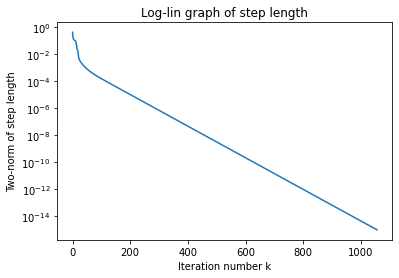
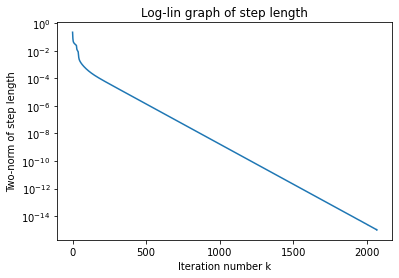

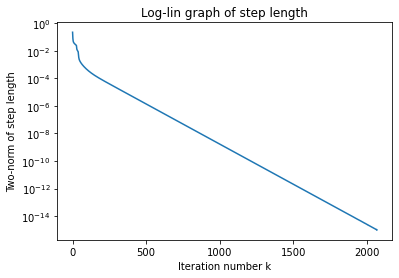

In [6]:
def problem_data():
    """
    problem_data() generates the problem data variables Q, q, a and b
    
    :return: (Q,q,a,b)
    """
    rs = np.random.RandomState(np.random.MT19937(np.random.SeedSequence(1)))
    n = 20
    Q = rs.randn(n,n)
    Q = Q.T@Q
    q = rs.randn(n)
    a = -rs.rand(n)
    b = rs.rand(n)
    return Q, q, a, b

(Q,q,a,b) = problem_data()

# Write your solution here
xk = np.add(a.copy(),b.copy())*(1/2) #initial guess
beta_array = np.linalg.eigvals(Q) #smoothness value
beta = np.max(beta_array)
gamma = 2/beta*0.5 #step size
norm_values = [] #norm values for plot

while(True):
    gradxk = grad_quad(xk,Q,q)
    xk1 = prox_box(xk-gamma*gradxk, a, b, gamma)
    norm = np.linalg.norm(np.subtract(xk1,xk))
    norm_values.append(norm)
    if(norm < pow(10, -15)):
        break
    xk=xk1.copy()
plt.yscale('log')
plt.xlabel('Iteration number k')
plt.ylabel('Two-norm of step length')
plt.title('Log-lin graph of step length')
plt.plot(norm_values)

$\DeclareMathOperator{\prox}{prox}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\Sym}{\mathbb{S}}$
$\newcommand{\norm}[1]{\lVert{#1}\rVert}$
$\DeclareMathOperator{\sign}{sign}$
$\DeclareMathOperator{\diag}{diag}$
$\DeclareMathOperator{\relint}{relint}$
$\DeclareMathOperator{\dom}{dom}$
---
### Task 10:

Solve the dual problem. 

__a)__ Similar to the previous task, find/verify the upper bound on the step-size and find a good step-size choice.

Let $x^{\text{final}}$ be the final points from Task 9 and $\mu^{\text{final}}$ the final point for the dual problem. Let $\hat{x}^{\text{final}}$ final primal points extracted from the final dual point $\mu^{\text{final}}$ using the expression from Task 7:

__b)__ Are $x^{\text{final}}$ and $\hat{x}^{\text{final}}$ the same?

__c)__ Is $\hat{x}^{\text{final}}$ in the box $S$?

__d)__ Let $\mu^k$ be the iterates of the dual method, using the expression from Task 7, extract the primal iterates $\hat{x}^k$ from $\mu^k$. Does $\hat{x}^k$ always satisfy the constraint $\hat{x}^k \in S$?

Also: 

__e)__ How do the function values $f\left(\hat{x}^k\right)$ develop over the iterations?

__f)__ What about $f\left(\hat{x}^k\right)+\iota_{S}\left(\hat{x}^k\right)$?

__Solution:__ 

_Fill in your solution here!_